In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import image_structure_maker
from reader import MovieObject
import os

fnames = os.listdir("../Data/")

In [37]:
fnames = [
"../Data_structures/Pos3_Temp20_GrowthTime5min_WaitRT60min_FastVideo_Cooling1Cper1s.21Oct2019_03.31.48.movie.pkl",
"../Data_structures/Pos3_Temp20_GrowthTime7min_WaitRT60min_FastVideo_Cooling1Cper1s.21Oct2019_05.24.18.movie.pkl",
"../Data_structures/Pos3_Temp20_GrowthTime10min_WaitRT60min_FastVideo_Cooling1Cper1s.18Oct2019_04.31.38.movie.pkl",
"../Data_structures/Pos3_Temp20_GrowthTime10min_WaitRT60min_FastVideo_Cooling1Cper1s.21Oct2019_07.19.45.movie.pkl",
"../Data_structures/Pos3_Temp20_GrowthTime15min_WaitRT60min_FastVideo_Cooling1Cper1s.18Oct2019_06.32.38.movie.pkl",
"../Data_structures/Pos3_Temp20_GrowthTime15min_WaitRT60min_FastVideo_Cooling1Cper1s.21Oct2019_09.20.15.movie.pkl",
"../Data_structures/Pos3_Temp20_GrowthTime30min_WaitRT60min_FastVideo_Cooling1Cper1s.18Oct2019_08.48.38.movie.pkl",
"../Data_structures/Pos3_Temp20_GrowthTime30min_WaitRT60min_FastVideo_Cooling1Cper1s.21Oct2019_11.35.44.movie.pkl",
]

In [38]:
image_structures = []

from fitter import Fitter

for i in fnames:
    image_structures.append(Fitter(i))

import numpy as np

f.get_image(300)

In [40]:
for i,t in zip(image_structures,[5,7,10,10,15,15,30,30]):
    i.growth_time = t

In [50]:
Q_NUMBER = 300

Text(0, 0.5, 'q')

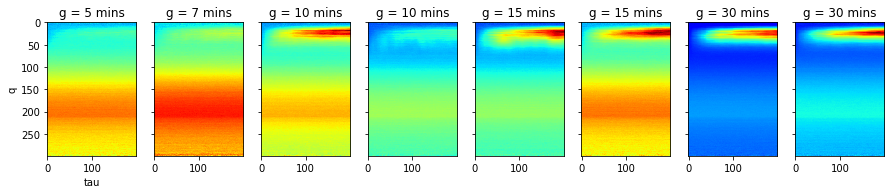

In [43]:
f,ax = plt.subplots(1,8,figsize = (15,3),sharex = True, sharey = True)
for f,a in zip(image_structures,ax):
    f.get_image(Q_NUMBER)
    a.imshow(f.q_tau_structure.transpose(),cmap = "jet")
    #a.set_title(f.fname)
    a.set_title(f"g = {f.growth_time} mins")
ax[0].set_xlabel('tau')
ax[0].set_ylabel('q')

/home/wtk23/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


Text(0, 0.5, 'q')

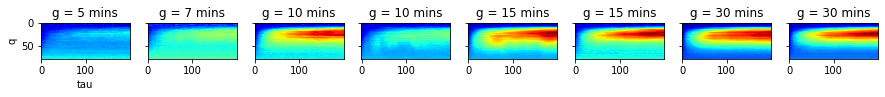

In [64]:
f,ax = plt.subplots(1,8,figsize = (15,3),sharex = True, sharey = True)
for f,a in zip(image_structures,ax):
    f.get_image(Q_NUMBER)
    a.imshow(np.log(f.q_tau_structure.transpose()[:80,:]),cmap = "jet") #note I've added a log.
    a.set_title(f"g = {f.growth_time} mins")
ax[0].set_xlabel('tau')
ax[0].set_ylabel('q')

In [65]:
# now we fit!!!! This is the subtle part!

def func_to_fit(x,a,b,c):
    return a*(1-np.exp(-x/b))+c

In [66]:
def diffusive_monodisperse_fit(q,D):
    return 1/q**2 * 1/D

In [67]:
from scipy.optimize import curve_fit

In [72]:
def fit_me(f,qmax):

    q_vals = np.arange(Q_NUMBER)[:qmax]

    cf_vals = []

    from copy import copy

    for i in q_vals:

        x = np.arange(0,f.max_tau) #why is that x?
        y = f.q_tau_structure[:,i] #choose which one!

        try:
            cf = curve_fit(func_to_fit,x,y,[y[-1]-y[0],100,y[0]])
        except:
            cf = [0]
        cf_vals.append(copy(cf))
    return (q_vals,cf_vals)

/home/wtk23/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/home/wtk23/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/wtk23/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/home/wtk23/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/wtk23/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/home/wtk23/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/home/wt

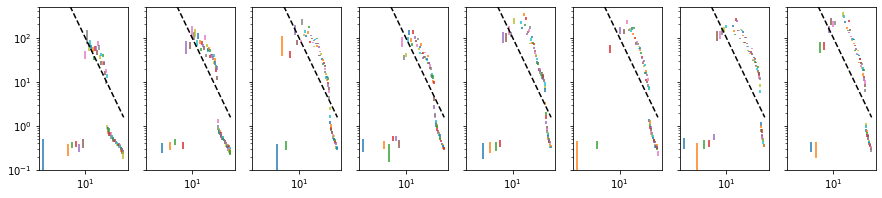

In [100]:
f,ax = plt.subplots(1,8,figsize = (15,3),sharex = True, sharey = True)

for f,a in zip(image_structures,ax):
    q_vals,cf_vals = fit_me(f,80)
    
    q_for_fitting = []
    b_for_fitting = []
    b_sigma_for_fitting = []
    #for reference, let's plot a 1 / x^2 as well
    
    for q,cf in zip(q_vals, cf_vals):
        if cf != [0]:
            if np.sqrt(cf[1][1][1]) < 50:
                a.errorbar(q,cf[0][1],np.sqrt(cf[1][1][1]))
            q_for_fitting.append(q)
            b_for_fitting.append(cf[0][1])
            b_sigma_for_fitting.append(np.sqrt(cf[1][1][1]))
      
    #plt.ylim(-200,400)
    x_tmp = np.linspace(1,80,100)
    y_tmp = 1/x_tmp**2 * 10000
    
    a.plot(x_tmp,y_tmp,'k--')
    
    a.set_ylim(0.1,500)
    
    a.set_yscale('log')
    a.set_xscale('log')
    
    

/home/wtk23/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/wtk23/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide


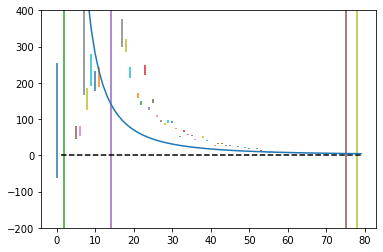

In [80]:
q_for_fitting = []
b_for_fitting = []
b_sigma_for_fitting = []

for q,cf in zip(qvals, cvals):
    if cf != [0]:
        plt.errorbar(q,cf[0][1],np.sqrt(cf[1][1][1]))
        q_for_fitting.append(q)
        b_for_fitting.append(cf[0][1])
        b_sigma_for_fitting.append(np.sqrt(cf[1][1][1]))
plt.ylim(-200,400)

#now we fit a 1/x^2 to this.
cf = curve_fit(diffusive_monodisperse_fit,
               q_for_fitting,b_for_fitting,
               sigma = b_sigma_for_fitting,
               p0 = 28000)

pred_b_vals = diffusive_monodisperse_fit(np.array(q_for_fitting),
                                         cf[0][0])
plt.plot(q_for_fitting, pred_b_vals,'k--')

#hmm... need to be slightly cleverer...

plt.plot(q_for_fitting, 1/np.array(q_for_fitting)**2*28000)